<a href="https://colab.research.google.com/github/sankalpachowdhury/Galaxy-Classification-using-CNN/blob/master/Galaxy_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Galaxy Classification**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras 
from keras.models import Sequential
import matplotlib.pyplot as plt



In [17]:
!unzip /content/Train.zip 

Archive:  /content/Train.zip
replace Train/100008.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
df = pd.read_csv('/content/training_sol.csv')

print(df.head)
#df_train, df_test = train_test_split(df, test_size=.2)
#df_train.shape, df_test.shape

<bound method NDFrame.head of      GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
0      100008  0.383147  0.616853  ...        0.0        0.0   0.325512
1      100023  0.327001  0.663777  ...        0.0        0.0   0.000000
2      100053  0.765717  0.177352  ...        0.0        0.0   0.000000
3      100078  0.693377  0.238564  ...        0.0        0.0   0.000000
4      100090  0.933839  0.000000  ...        0.0        0.0   0.000000
..        ...       ...       ...  ...        ...        ...        ...
495    107298  0.927399  0.072601  ...        0.0        0.0   0.000000
496    107314  0.098727  0.900492  ...        0.0        0.0   0.000000
497    107355  0.173073  0.814717  ...        0.0        0.0   0.052150
498    107374  0.191347  0.786178  ...        0.0        0.0   0.150748
499    107379  0.028279  0.971721  ...        0.0        0.0   0.251836

[500 rows x 38 columns]>


In [20]:
df.drop(columns=["GalaxyID"], inplace = True)
print(df)

     Class1.1  Class1.2  Class1.3  ...  Class11.4  Class11.5  Class11.6
0    0.383147  0.616853  0.000000  ...        0.0        0.0   0.325512
1    0.327001  0.663777  0.009222  ...        0.0        0.0   0.000000
2    0.765717  0.177352  0.056931  ...        0.0        0.0   0.000000
3    0.693377  0.238564  0.068059  ...        0.0        0.0   0.000000
4    0.933839  0.000000  0.066161  ...        0.0        0.0   0.000000
..        ...       ...       ...  ...        ...        ...        ...
495  0.927399  0.072601  0.000000  ...        0.0        0.0   0.000000
496  0.098727  0.900492  0.000780  ...        0.0        0.0   0.000000
497  0.173073  0.814717  0.012210  ...        0.0        0.0   0.052150
498  0.191347  0.786178  0.022475  ...        0.0        0.0   0.150748
499  0.028279  0.971721  0.000000  ...        0.0        0.0   0.251836

[500 rows x 37 columns]


In [21]:
df.columns

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [22]:
df.head(10)

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,0.000000,0.000000,0.238159,0.000000,0.197930,0.802070,0.066807,0.663691,0.008335,0.0,0.000000,0.049482,0.098965,0.049482,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,0.000000,0.000000,0.456033,0.000000,0.687647,0.312353,0.388158,0.074334,0.000000,0.0,0.000000,0.000000,0.000000,0.213858,0.473789,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,0.067228,0.123625,0.027836,0.069656,0.473888,0.526112,0.482483,0.205300,0.000000,0.0,0.067766,0.033646,0.000000,0.304710,0.067766,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,0.160096,0.760688,0.034417,0.000000,0.611499,0.388501,0.010917,0.010917,0.000000,0.0,0.032377,0.064143,0.450225,0.000000,0.032377,0.032377,0.000000,0.0,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.410635,0.589365,0.000000,0.000000,0.269843,0.0,0.000000,0.034117,0.000000,0.136878,0.239640,0.000000,0.561429,0.0,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
train_label = np.array(df)
print(train_label)

[[0.383147   0.616853   0.         ... 0.         0.         0.32551225]
 [0.327001   0.663777   0.009222   ... 0.         0.         0.        ]
 [0.765717   0.177352   0.056931   ... 0.         0.         0.        ]
 ...
 [0.173073   0.814717   0.01221    ... 0.         0.         0.05214994]
 [0.191347   0.786178   0.022475   ... 0.         0.         0.15074843]
 [0.028279   0.971721   0.         ... 0.         0.         0.25183574]]


# Data preprocessing 

In [33]:
import os
import PIL
import PIL.Image

In [36]:
img = "/content/Train/100008.jpg"
#tf.image.resize()
plt.imread(img)
#os.path.join(/content/Train)

array([[[2, 2, 0],
        [4, 4, 2],
        [5, 5, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[5, 5, 3],
        [6, 6, 4],
        [6, 6, 4],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[7, 7, 5],
        [8, 8, 6],
        [8, 8, 6],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       ...,

       [[6, 6, 4],
        [5, 5, 3],
        [4, 4, 2],
        ...,
        [4, 4, 2],
        [2, 2, 0],
        [0, 0, 0]],

       [[6, 6, 4],
        [5, 5, 3],
        [4, 4, 2],
        ...,
        [2, 2, 0],
        [1, 1, 0],
        [0, 0, 0]],

       [[6, 6, 4],
        [5, 5, 3],
        [4, 4, 2],
        ...,
        [1, 1, 0],
        [1, 1, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = df.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('content/Train/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch
            
X_train = get_all_images(df_train)
#X_test, y_test = get_all_images(df_test)

NameError: ignored

In [ ]:
a = get_image('/content/Train/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)

In [40]:
import os
data_path = "/content/Train"
image_count = len(list(os.get.glob('*/*.jpg')))

image_count

TypeError: ignored

In [41]:
tf.data.Dataset.from_tensor_slices(("/content/Train"))

ValueError: ignored

In [65]:
import matplotlib.pyplot as plt

from tqdm import tqdm

def get_all_images(df):
   # x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
   # y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = df.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
      if(i!='100143'):
        x = plt.imread('/content/Train/'+i+'.jpg')
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch
            
X_train = get_all_images(df)
print(X_train[0].shape)

100%|██████████| 500/500 [00:01<00:00, 324.76it/s]


(424, 424, 3)


In [ ]:
def get_all_images(df, shape):
   # x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
   # y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = df.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
      if(i!='100143'):
        x = plt.imread('/content/Train/'+i+'.jpg')
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch
            
X_train = get_all_images(df)
print(X_train[0].shape)

100%|██████████| 2/2 [00:00<00:00, 50.17it/s]

['100008' '100023']


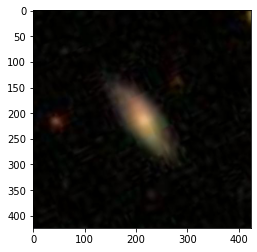

In [60]:

sel = df.values
ids = sel[:2,0].astype(int).astype(str)
print(ids)
#x_batch = []
for i in tqdm(ids):
    x = plt.imread('/content/Train/'+i+'.jpg')
    plt.imshow(x)

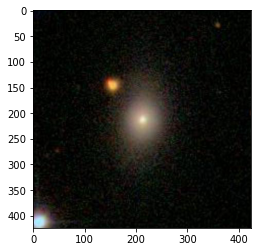

In [83]:
plt.imshow(plt.imread("/content/Train/104611.jpg"))

In [79]:
new_format = tf.image.resize(
    plt.imread("/content/Train/104611.jpg"), (224, 224)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


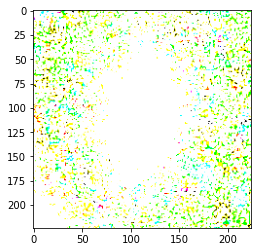

In [84]:
plt.imshow(new_format)

In [ ]:
from skimage.transform import resize
x = resize(plt.imread("/content/Train/") , (64, 64))


In [96]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)
path = "/content/Train/104611.jpg"

x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
res = get_image(path, x1, y1, IMG_SHAPE, CROP_SIZE)
print(res)
#plt.imshow(res)

[[[3.46020761e-05 5.76701269e-05 7.68935025e-06]
  [5.38254517e-05 7.30488274e-05 7.68935025e-06]
  [4.22914264e-05 6.53594771e-05 0.00000000e+00]
  ...
  [6.15148020e-05 7.68935025e-05 4.22914264e-05]
  [6.92041522e-05 8.84275279e-05 4.99807766e-05]
  [7.30488274e-05 1.03806228e-04 5.76701269e-05]]

 [[8.07381776e-05 8.84275279e-05 3.07574010e-05]
  [7.68935025e-05 7.68935025e-05 1.53787005e-05]
  [1.07650903e-04 1.11495579e-04 4.99807766e-05]
  ...
  [7.30488274e-05 6.15148020e-05 3.46020761e-05]
  [8.45828527e-05 7.68935025e-05 4.61361015e-05]
  [1.15340254e-04 1.42252980e-04 9.99615532e-05]]

 [[1.42252980e-04 9.99615532e-05 5.38254517e-05]
  [1.34563629e-04 9.61168781e-05 5.38254517e-05]
  [1.30718954e-04 9.61168781e-05 4.99807766e-05]
  ...
  [1.07650903e-04 6.92041522e-05 5.38254517e-05]
  [1.03806228e-04 7.68935025e-05 4.99807766e-05]
  [1.49942330e-04 1.73010381e-04 1.30718954e-04]]

 ...

 [[5.38254517e-05 6.92041522e-05 3.84467512e-05]
  [1.07650903e-04 9.99615532e-05 6.9204

Good Night!! 12/07/2020